In [1]:
import torch
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection

from variational_ib import *
from dataloaders import *

from tqdm import tqdm

In [2]:
lowPresence = pd.read_csv('./data/lowDiversity/lowDiversityPresenceAbsence.csv')
midPresence = pd.read_csv('./data/midDiversity/midDiversityPresenceAbsence.csv')
highPresence = pd.read_csv('./data/highDiversity/highDiversityPresenceAbsence.csv')

lowRelAbs = pd.read_csv('./data/lowDiversity/lowDiversityFunctionalData.csv')
midRelAbs = pd.read_csv('./data/midDiversity/midDiversityFunctionalData.csv')
highRelAbs = pd.read_csv('./data/highDiversity/highDiversityFunctionalData.csv')

trainLowPresence, testLowPresence, trainLowRelAbs, testLowRelAbs = sklearn.model_selection.train_test_split(lowPresence, lowRelAbs)
trainMidPresence, testMidPresence, trainMidRelAbs, testMidRelAbs = sklearn.model_selection.train_test_split(midPresence, midRelAbs)
trainHighPresence, testHighPresence, trainHighRelAbs, testHighRelAbs = sklearn.model_selection.train_test_split(highPresence, highRelAbs)


In [3]:
trainLowDivDataset = Ecology_Dataset(trainLowPresence, trainLowRelAbs)
testLowDivDataset = Ecology_Dataset(testLowPresence, testLowRelAbs)

trainMidDivDataset = Ecology_Dataset(trainMidPresence, trainMidRelAbs)
testMidDivDataset = Ecology_Dataset(testMidPresence, testMidRelAbs)

trainHighDivDataset = Ecology_Dataset(trainHighPresence, trainHighRelAbs)
testHighDivDataset = Ecology_Dataset(testHighPresence, testHighRelAbs)

LowDivDataset = Ecology_Dataset(lowPresence, lowRelAbs)
MidDivDataset = Ecology_Dataset(midPresence, midRelAbs)
HighDivDataset = Ecology_Dataset(highPresence, highRelAbs)

In [4]:
highRelAbs.shape

(180, 5)

In [5]:
encoder = Encoder(
    input_dim=trainLowDivDataset.data_dim,
    hidden_dims=[200,200,200],
    latent_dim=3,
    activation=None
)

decoder = Decoder(
    latent_dim=3,
    hidden_dims=[200,200,200],
    output_dim=5,
    activation=None
)

vib = VariationalIB(encoder, decoder, latent_dim=3, input_dim=trainLowDivDataset.data_dim)


In [6]:
trainLowDivDataLoader = torch.utils.data.DataLoader(trainLowDivDataset, batch_size=32, shuffle = True)
testLowDivDataLoader = torch.utils.data.DataLoader(testLowDivDataset, batch_size=32)

trainMidDivDataLoader = torch.utils.data.DataLoader(trainMidDivDataset, batch_size=32, shuffle = True)
testMidDivDataLoader = torch.utils.data.DataLoader(testMidDivDataset, batch_size=32)

trainHighDivDataLoader = torch.utils.data.DataLoader(trainHighDivDataset, batch_size=32, shuffle = True)
testHighDivDataLoader = torch.utils.data.DataLoader(testHighDivDataset, batch_size=32)

LowDivDataLoader = torch.utils.data.DataLoader(LowDivDataset, batch_size=32)
MidDivDataLoader = torch.utils.data.DataLoader(MidDivDataset, batch_size=32)
HighDivDataLoader = torch.utils.data.DataLoader(HighDivDataset, batch_size=32)

In [12]:
latent_dim = 2

encoder = Encoder(
    input_dim=trainLowDivDataset.data_dim,
    hidden_dims=[10,10,10],
    latent_dim=latent_dim,
    activation=None
)

decoder = Decoder(
    latent_dim=latent_dim,
    hidden_dims=[10,10,10],
    output_dim=5,
    activation=None
)

vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
optim = torch.optim.Adam(params=vib.parameters(), lr=1e-6)


for batch in trainLowDivDataLoader:
    optim.zero_grad()
    
    batch = vib(batch)

    elbo_loss = (vib.prior_loss(batch)).mean()
    Y = batch['Y']
    Yhat = batch['Yhat']
    recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)).mean()

    loss = recon_loss + 0 * elbo_loss
    loss.backward()
    optim.step()
    print(recon_loss.item())
    print(elbo_loss.item())

274.0937194824219
0.09140927344560623
341.5089416503906
0.09102924168109894
366.7019348144531
0.09292664378881454
346.6900939941406
0.09860263764858246
323.0046081542969
0.09486456215381622
326.49139404296875
0.09156125783920288
230.94480895996094
0.09253990650177002
236.36456298828125
0.0926806703209877
274.69488525390625
0.09446050971746445
235.00076293945312
0.09217433631420135
286.7037353515625
0.0908946841955185
314.4667663574219
0.0939641073346138
337.94781494140625
0.09585492312908173
263.4904479980469
0.09303537011146545
364.2999572753906
0.09265311807394028
245.5926971435547
0.09368658065795898
259.3400573730469
0.09697673469781876
219.72805786132812
0.09231176972389221
326.75439453125
0.09641619771718979
288.991455078125
0.0940556526184082
137.15716552734375
0.09654781222343445


In [57]:
batch

{'X': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
          1., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0

In [18]:
recon_loss_collected = []
prior_loss_collected = []

low_I_XZ_test_low = []
low_I_YZ_test_low = []

low_I_XZ_test_mid = []
low_I_YZ_test_mid = []

low_I_XZ_test_high = []
low_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-5)
    
    for epoch in range(max_epochs):
        for batch in trainLowDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testLowDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testLowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_low.append(elbo_loss / len(testLowDivDataset))
    low_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_mid.append(elbo_loss / len(testMidDivDataset))
    low_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_high.append(elbo_loss / len(testHighDivDataset))
    low_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:07<13:15,  7.95s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:16<13:15,  8.03s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:24<13:15,  8.12s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:32<13:17,  8.23s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:40<13:12,  8.25s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:49<13:08,  8.30s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:57<13:00,  8.30s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [01:05<12:52,  8.31s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [01:14<12:49,  8.37s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [01:23<12:46,  8.43s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [01:31<12:49,  8.55s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [01:40<12:44,  8.58s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [01:49<12:40,  8.64s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [01:58<12:34,  8.67s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [02:06<12:26,  8.67s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [02:15<12:22,  8.74s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [02:24<12:15,  8.76s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [02:33<12:10,  8.80s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [02:42<11:59,  8.77s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [02:50<11:48,  8.74s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [02:59<11:40,  8.76s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [03:08<11:34,  8.79s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [03:17<11:28,  8.82s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [03:26<11:21,  8.85s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [03:35<11:14,  8.88s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [03:44<11:06,  8.88s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [03:52<10:58,  8.89s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [04:01<10:46,  8.86s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [04:10<10:38,  8.86s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [04:19<10:35,  8.95s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [04:28<10:25,  8.94s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [04:37<10:17,  8.94s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [04:46<10:08,  8.95s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [04:55<10:01,  8.97s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [05:04<09:49,  8.93s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [05:13<09:39,  8.91s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [05:22<09:35,  8.99s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [05:31<09:23,  8.95s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [05:40<09:14,  8.94s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [05:49<09:06,  8.95s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [05:58<08:58,  8.98s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [06:07<08:47,  8.94s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [06:16<08:38,  8.93s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [06:25<08:32,  8.99s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [06:34<08:24,  9.01s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [06:43<08:13,  8.98s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [06:52<08:03,  8.96s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [07:01<07:55,  8.97s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [07:10<07:47,  9.00s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [07:19<07:38,  8.98s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [07:27<07:28,  8.96s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [07:36<07:20,  8.98s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [07:45<07:11,  8.99s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [07:54<07:01,  8.97s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [08:03<06:52,  8.98s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [08:12<06:45,  9.01s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [08:21<06:36,  9.01s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [08:30<06:26,  8.98s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [08:40<06:19,  9.03s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [08:49<06:09,  9.02s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [08:58<06:00,  9.02s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [09:07<05:52,  9.04s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [09:16<05:42,  9.01s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [09:25<05:33,  9.00s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [09:34<05:25,  9.06s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [09:43<05:21,  9.18s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [09:53<05:13,  9.23s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [10:02<05:05,  9.26s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [10:11<04:58,  9.34s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [10:21<04:53,  9.46s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [10:31<04:44,  9.48s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [10:40<04:35,  9.50s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [10:50<04:27,  9.57s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [11:00<04:18,  9.58s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [11:09<04:09,  9.60s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [11:19<04:02,  9.69s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [11:29<03:51,  9.64s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [11:38<03:39,  9.55s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [11:47<03:27,  9.45s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [11:57<03:17,  9.40s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [12:06<03:07,  9.38s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [12:15<02:56,  9.31s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [12:24<02:47,  9.28s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [12:33<02:37,  9.24s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [12:42<02:27,  9.20s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [12:52<02:17,  9.19s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [13:01<02:09,  9.27s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [13:10<02:00,  9.24s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [13:19<01:50,  9.22s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [13:29<01:41,  9.18s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [13:38<01:32,  9.29s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [13:47<01:23,  9.27s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [13:57<01:15,  9.43s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [14:06<01:05,  9.33s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [14:15<00:55,  9.23s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [14:24<00:45,  9.13s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [14:33<00:36,  9.00s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [14:42<00:26,  8.93s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [14:51<00:18,  9.09s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [15:00<00:09,  9.14s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [15:09<00:00,  9.01s/it]

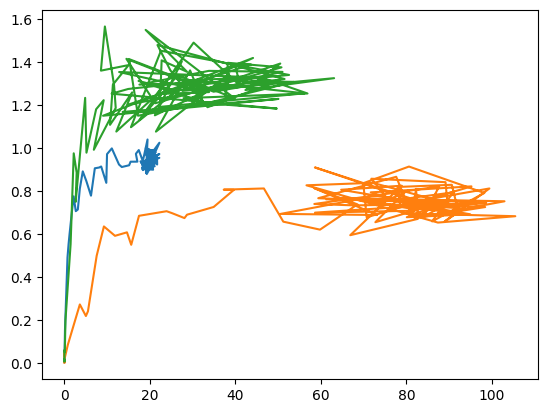

In [19]:
plt.plot(low_I_XZ_test_low, low_I_YZ_test_low, label = "Low diversity data")
plt.plot(low_I_XZ_test_mid, low_I_YZ_test_mid, label = "Mid diversity data")
plt.plot(low_I_XZ_test_high, low_I_YZ_test_high, label = "High diversity data")


In [23]:
recon_loss_collected = []
prior_loss_collected = []

mid_I_XZ_test_low = []
mid_I_YZ_test_low = []

mid_I_XZ_test_mid = []
mid_I_YZ_test_mid = []

mid_I_XZ_test_high = []
mid_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainMidDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testMidDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testLowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_low.append(elbo_loss / len(testLowDivDataset))
    mid_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_mid.append(elbo_loss / len(testMidDivDataset))
    mid_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_high.append(elbo_loss / len(testHighDivDataset))
    mid_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:04<07:39,  4.59s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:09<07:29,  4.55s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:13<07:22,  4.51s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:18<07:24,  4.58s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:22<07:16,  4.55s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:27<07:10,  4.53s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:31<07:07,  4.54s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [00:36<07:05,  4.57s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [00:40<06:58,  4.55s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [00:45<06:51,  4.52s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [00:49<06:45,  4.51s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [00:54<06:40,  4.50s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [00:58<06:37,  4.52s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [01:03<06:34,  4.54s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [01:08<06:28,  4.52s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [01:12<06:25,  4.53s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [01:17<06:20,  4.52s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [01:21<06:18,  4.56s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [01:26<06:15,  4.58s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [01:31<06:14,  4.62s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [01:35<06:09,  4.62s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [01:40<06:05,  4.63s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [01:45<06:02,  4.64s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [01:49<06:00,  4.69s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [01:54<05:56,  4.69s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [01:59<05:54,  4.72s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [02:04<05:50,  4.74s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [02:08<05:46,  4.74s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [02:13<05:39,  4.72s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [02:18<05:34,  4.71s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [02:22<05:29,  4.71s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [02:27<05:27,  4.75s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [02:32<05:22,  4.75s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [02:37<05:17,  4.74s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [02:41<05:12,  4.73s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [02:46<05:08,  4.74s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [02:51<05:03,  4.75s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [02:56<05:01,  4.78s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [03:01<05:06,  4.95s/it]

1.1748975549395302e-05


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                    | 40/101 [12:48<3:02:22, 179.39s/it]

1.584893192461114e-05


 41%|███████████████████████████████████████████████████████████████████▊                                                                                                   | 41/101 [12:53<2:07:14, 127.25s/it]

2.1379620895022323e-05


 42%|█████████████████████████████████████████████████████████████████████▊                                                                                                  | 42/101 [12:59<1:29:16, 90.78s/it]

2.8840315031266056e-05


 43%|███████████████████████████████████████████████████████████████████████▌                                                                                                | 43/101 [13:04<1:02:51, 65.03s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [13:09<44:38, 46.98s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [13:13<32:02, 34.32s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [13:18<23:18, 25.43s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [13:23<17:26, 19.39s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [13:28<13:13, 14.97s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [13:33<10:16, 11.86s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [13:37<08:13,  9.68s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [13:42<06:47,  8.15s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [13:46<05:45,  7.05s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [13:51<05:01,  6.28s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [13:56<04:32,  5.81s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [14:00<04:13,  5.50s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [14:05<03:59,  5.32s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [14:10<03:44,  5.11s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [14:15<03:42,  5.17s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [14:20<03:29,  4.98s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [14:24<03:19,  4.88s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [14:29<03:11,  4.80s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [14:34<03:08,  4.83s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [14:39<03:03,  4.82s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [14:43<02:57,  4.78s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [14:48<02:51,  4.78s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [14:53<02:46,  4.75s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [14:57<02:40,  4.73s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [15:02<02:36,  4.76s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [15:07<02:32,  4.77s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [15:12<02:27,  4.75s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [15:17<02:22,  4.75s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [15:21<02:17,  4.75s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [15:26<02:12,  4.74s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [15:31<02:07,  4.73s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [15:35<02:03,  4.73s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [15:40<02:00,  4.81s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [15:45<01:54,  4.79s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [15:50<01:49,  4.78s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [15:55<01:45,  4.77s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [15:59<01:40,  4.79s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [16:04<01:35,  4.80s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [16:09<01:31,  4.81s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [16:14<01:27,  4.88s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [16:19<01:22,  4.84s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [16:24<01:18,  4.90s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [16:29<01:12,  4.86s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [16:34<01:09,  4.93s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [16:39<01:04,  4.94s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [16:44<00:58,  4.89s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [16:48<00:53,  4.87s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [16:53<00:48,  4.85s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [16:58<00:43,  4.89s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [17:03<00:39,  4.88s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [17:08<00:34,  4.90s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [17:13<00:29,  4.87s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [17:18<00:24,  4.85s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [17:22<00:19,  4.85s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [17:27<00:14,  4.87s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [17:32<00:09,  4.85s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [17:37<00:04,  4.91s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [17:42<00:00, 10.52s/it]

Text(0.5, 1.0, 'Models trained on Mid Diversity Data')

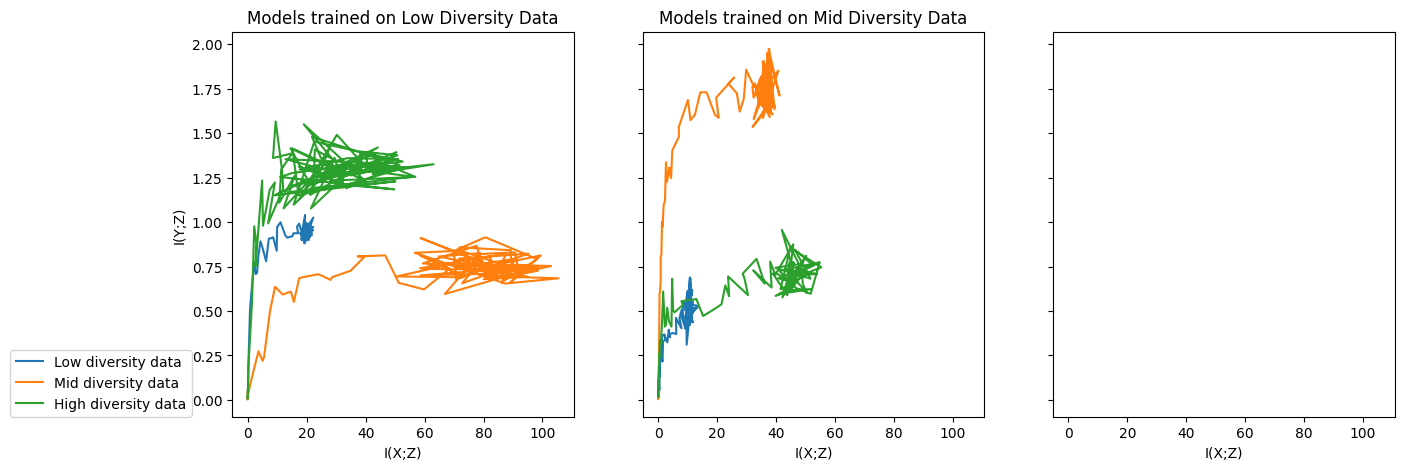

In [24]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)

axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')
axs[2].set_xlabel('I(X;Z)')


axs[0].plot(low_I_XZ_test_low, low_I_YZ_test_low, label = "Low diversity data")
axs[0].plot(low_I_XZ_test_mid, low_I_YZ_test_mid, label = "Mid diversity data")
axs[0].plot(low_I_XZ_test_high, low_I_YZ_test_high, label = "High diversity data")
axs[0].set_title('Models trained on Low Diversity Data')

axs[0].legend(loc=(-.65, 0))

axs[1].plot(mid_I_XZ_test_low, mid_I_YZ_test_low, label = "Low diversity data")
axs[1].plot(mid_I_XZ_test_mid, mid_I_YZ_test_mid, label = "Mid diversity data")
axs[1].plot(mid_I_XZ_test_high, mid_I_YZ_test_high, label = "High diversity data")
axs[1].set_title('Models trained on Mid Diversity Data')

In [25]:
recon_loss_collected = []
prior_loss_collected = []

high_I_XZ_test_low = []
high_I_YZ_test_low = []

high_I_XZ_test_mid = []
high_I_YZ_test_mid = []

high_I_XZ_test_high = []
high_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainHighDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testHighDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testLowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_low.append(elbo_loss / len(testLowDivDataset))
    high_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_mid.append(elbo_loss / len(testMidDivDataset))
    high_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_high.append(elbo_loss / len(testHighDivDataset))
    high_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:01<03:16,  1.96s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:03<03:13,  1.96s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:05<03:10,  1.94s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:07<03:09,  1.95s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:09<03:07,  1.95s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:11<03:05,  1.95s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:13<03:03,  1.96s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [00:15<03:01,  1.96s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [00:17<03:02,  1.98s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [00:19<03:00,  1.98s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [00:21<02:58,  1.98s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [00:23<02:55,  1.97s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [00:25<02:53,  1.98s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [00:27<02:55,  2.01s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [00:29<02:51,  1.99s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [00:31<02:48,  1.98s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [00:33<02:45,  1.97s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [00:35<02:43,  1.97s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [00:37<02:40,  1.96s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [00:39<02:40,  1.99s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [00:41<02:39,  2.00s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [00:43<02:36,  1.98s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [00:45<02:33,  1.97s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [00:47<02:30,  1.96s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [00:49<02:28,  1.95s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [00:51<02:26,  1.95s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [00:53<02:24,  1.95s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [00:55<02:22,  1.95s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [00:57<02:21,  1.97s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [00:59<02:19,  1.96s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [01:00<02:17,  1.96s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [01:03<02:19,  2.02s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [01:05<02:15,  2.00s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [01:07<02:14,  2.01s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [01:09<02:11,  2.00s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [01:11<02:10,  2.00s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [01:13<02:07,  1.99s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [01:15<02:05,  1.98s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [01:17<02:02,  1.98s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [01:18<02:00,  1.97s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [01:20<01:58,  1.97s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [01:22<01:56,  1.97s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [01:24<01:54,  1.98s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [01:27<01:54,  2.02s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [01:28<01:51,  2.00s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [01:31<01:50,  2.02s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [01:33<01:48,  2.00s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [01:34<01:45,  1.99s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [01:36<01:43,  1.99s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [01:38<01:40,  1.98s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [01:40<01:38,  1.97s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [01:42<01:36,  1.96s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [01:44<01:33,  1.96s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [01:46<01:31,  1.96s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [01:48<01:29,  1.95s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [01:50<01:27,  1.95s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [01:52<01:26,  1.96s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [01:54<01:27,  2.03s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [01:56<01:24,  2.01s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [01:58<01:21,  2.00s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [02:00<01:19,  1.99s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [02:02<01:17,  1.98s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [02:04<01:15,  1.98s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [02:06<01:13,  1.98s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [02:08<01:11,  1.98s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [02:10<01:08,  1.97s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [02:12<01:06,  1.97s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [02:14<01:04,  1.96s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [02:16<01:04,  2.01s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [02:18<01:02,  2.02s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [02:20<01:00,  2.00s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [02:22<00:57,  2.00s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [02:24<00:55,  1.99s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [02:26<00:53,  1.98s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [02:28<00:51,  1.97s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [02:30<00:49,  1.97s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [02:32<00:47,  1.97s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [02:34<00:45,  1.97s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [02:36<00:43,  1.96s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [02:38<00:41,  1.96s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [02:40<00:39,  1.96s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [02:42<00:38,  2.03s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [02:44<00:36,  2.02s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [02:46<00:34,  2.01s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [02:48<00:31,  2.00s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [02:50<00:29,  1.98s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [02:52<00:27,  1.98s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [02:54<00:25,  1.97s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [02:56<00:23,  1.98s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [02:58<00:21,  1.98s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [03:00<00:19,  1.98s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [03:02<00:17,  1.97s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [03:04<00:15,  1.97s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [03:06<00:14,  2.01s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [03:08<00:12,  2.00s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [03:10<00:09,  2.00s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [03:12<00:07,  2.00s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [03:14<00:06,  2.03s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [03:16<00:04,  2.02s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [03:18<00:02,  2.00s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [03:20<00:00,  1.98s/it]

Text(0.5, 1.0, 'Models trained on High Diversity Data')

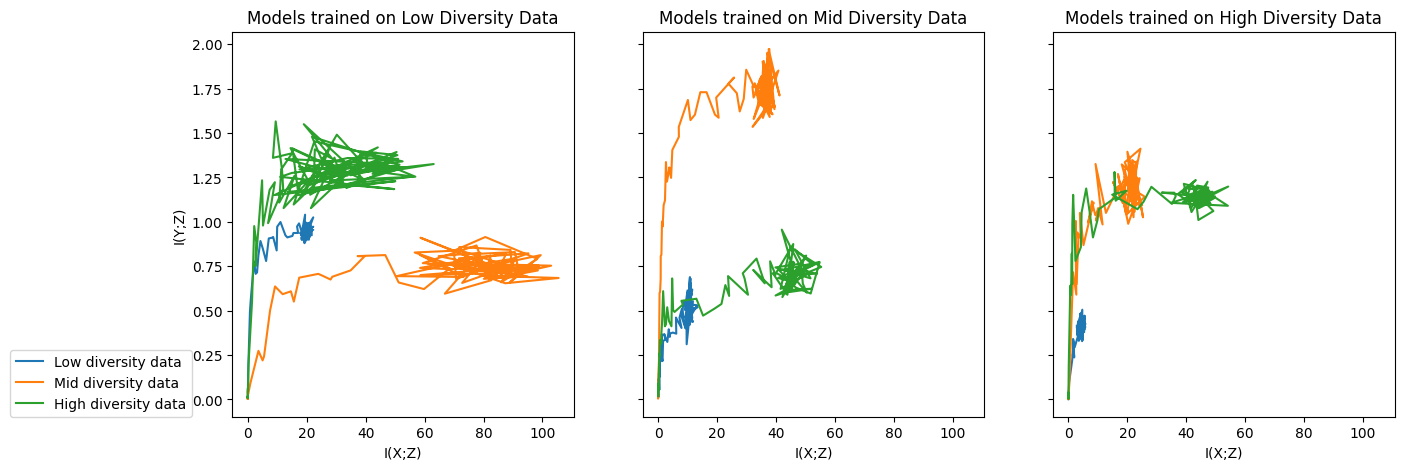

In [26]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)

axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')
axs[2].set_xlabel('I(X;Z)')


axs[0].plot(low_I_XZ_test_low, low_I_YZ_test_low, label = "Low diversity data")
axs[0].plot(low_I_XZ_test_mid, low_I_YZ_test_mid, label = "Mid diversity data")
axs[0].plot(low_I_XZ_test_high, low_I_YZ_test_high, label = "High diversity data")
axs[0].set_title('Models trained on Low Diversity Data')

axs[0].legend(loc=(-.65, 0))

axs[1].plot(mid_I_XZ_test_low, mid_I_YZ_test_low, label = "Low diversity data")
axs[1].plot(mid_I_XZ_test_mid, mid_I_YZ_test_mid, label = "Mid diversity data")
axs[1].plot(mid_I_XZ_test_high, mid_I_YZ_test_high, label = "High diversity data")
axs[1].set_title('Models trained on Mid Diversity Data')

axs[2].plot(high_I_XZ_test_low, high_I_YZ_test_low, label = "Low diversity data")
axs[2].plot(high_I_XZ_test_mid, high_I_YZ_test_mid, label = "Mid diversity data")
axs[2].plot(high_I_XZ_test_high, high_I_YZ_test_high, label = "High diversity data")
axs[2].set_title('Models trained on High Diversity Data')

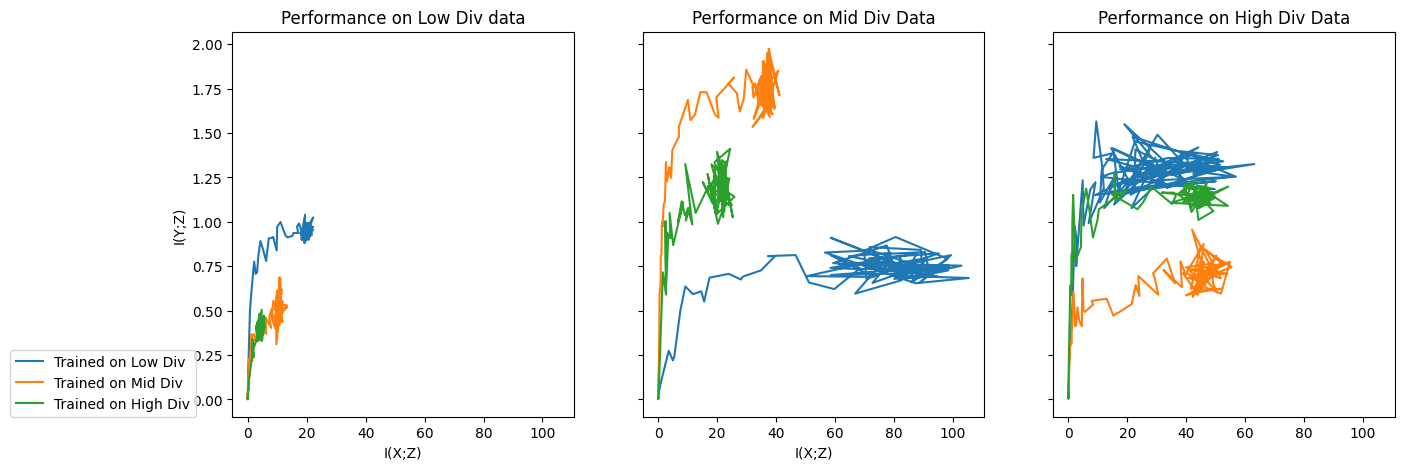

In [27]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)



axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')

axs[0].set_title('Performance on Low Div data')
axs[0].plot(low_I_XZ_test_low, low_I_YZ_test_low, label = 'Trained on Low Div')
axs[0].plot(mid_I_XZ_test_low, mid_I_YZ_test_low, label = 'Trained on Mid Div')
axs[0].plot(high_I_XZ_test_low, high_I_YZ_test_low, label = 'Trained on High Div')

axs[1].set_title('Performance on Mid Div Data')
axs[1].plot(low_I_XZ_test_mid, low_I_YZ_test_mid, label = 'Trained on Low Div')
axs[1].plot(mid_I_XZ_test_mid, mid_I_YZ_test_mid, label = 'Trained on Mid Div')
axs[1].plot(high_I_XZ_test_mid, high_I_YZ_test_mid, label = 'Trained on High Div')

axs[2].set_title('Performance on High Div Data')
axs[2].plot(low_I_XZ_test_high, low_I_YZ_test_high, label = 'Trained on Low Div')
axs[2].plot(mid_I_XZ_test_high, mid_I_YZ_test_high, label = 'Trained on Mid Div')
axs[2].plot(high_I_XZ_test_high, high_I_YZ_test_high, label = 'Trained on High Div')

axs[0].legend(loc = (-0.65,0))

In [36]:
recon_loss_collected = []
prior_loss_collected = []

low_I_XZ_test_low_nonlinear = []
low_I_YZ_test_low_nonlinear = []

low_I_XZ_test_mid_nonlinear = []
low_I_YZ_test_mid_nonlinear = []

low_I_XZ_test_high_nonlinear = []
low_I_YZ_test_high_nonlinear = []

batch_size = 32
latent_dim = 10
max_epochs = 400

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=torch.nn.ReLU()
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=torch.nn.ReLU()
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainLowDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testLowDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testLowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_low_nonlinear.append(elbo_loss / len(testLowDivDataset))
    low_I_YZ_test_low_nonlinear.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_mid_nonlinear.append(elbo_loss / len(testMidDivDataset))
    low_I_YZ_test_mid_nonlinear.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_high_nonlinear.append(elbo_loss / len(testHighDivDataset))
    low_I_YZ_test_high_nonlinear.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:19<31:48, 19.08s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:37<31:06, 18.86s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:57<31:05, 19.04s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [01:16<30:52, 19.10s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [01:35<30:31, 19.07s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [01:54<30:13, 19.08s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [02:14<30:27, 19.44s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [02:33<29:56, 19.32s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [02:52<29:31, 19.26s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [03:11<29:12, 19.26s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [03:31<29:01, 19.35s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [03:51<28:55, 19.50s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [04:10<28:28, 19.42s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [04:29<28:03, 19.35s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [04:49<27:40, 19.31s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [05:09<27:40, 19.54s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [05:28<27:16, 19.48s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [05:47<26:57, 19.49s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [06:07<26:37, 19.48s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [06:26<26:19, 19.50s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [06:46<26:11, 19.64s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [07:06<26:01, 19.77s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [07:26<25:34, 19.67s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [07:45<25:08, 19.59s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [08:04<24:36, 19.43s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [08:24<24:20, 19.47s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [08:43<23:56, 19.41s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [09:02<23:33, 19.37s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [09:22<23:10, 19.31s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [09:41<22:43, 19.20s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [09:59<22:12, 19.04s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [10:19<22:00, 19.13s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [10:38<21:49, 19.26s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [10:58<21:31, 19.28s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [11:16<21:06, 19.19s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [11:36<20:46, 19.18s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [11:55<20:35, 19.31s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [12:14<20:02, 19.08s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [12:33<19:46, 19.14s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [12:52<19:24, 19.08s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [13:12<19:12, 19.21s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [13:31<18:56, 19.27s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [13:50<18:36, 19.24s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [14:09<18:18, 19.26s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [14:29<18:00, 19.30s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [14:48<17:43, 19.34s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [15:08<17:23, 19.32s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [15:27<17:07, 19.39s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [15:47<16:55, 19.54s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [16:06<16:34, 19.50s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [16:26<16:11, 19.43s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [16:45<15:51, 19.41s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [17:05<15:36, 19.50s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [17:25<15:20, 19.58s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [17:44<15:00, 19.57s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [18:04<14:40, 19.56s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [18:22<14:11, 19.36s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [18:41<13:47, 19.23s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [19:00<13:24, 19.17s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [19:20<13:08, 19.24s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [19:39<12:46, 19.16s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [19:59<12:36, 19.39s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [20:20<12:36, 19.90s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [20:41<12:24, 20.13s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [21:01<12:09, 20.26s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [21:22<11:53, 20.38s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [21:43<11:46, 20.78s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [22:04<11:28, 20.86s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [22:25<11:06, 20.83s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [22:46<10:44, 20.79s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [23:07<10:22, 20.76s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [23:27<09:57, 20.61s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [23:47<09:30, 20.38s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [24:07<09:11, 20.41s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [24:27<08:45, 20.21s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [24:47<08:23, 20.13s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [25:07<08:00, 20.01s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [25:27<07:42, 20.10s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [25:47<07:20, 20.02s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [26:07<07:02, 20.11s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [26:27<06:38, 19.94s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [26:46<06:17, 19.85s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [27:06<05:58, 19.90s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [27:26<05:34, 19.70s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [27:45<05:15, 19.70s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [28:05<04:53, 19.60s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [28:25<04:35, 19.70s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [28:44<04:14, 19.60s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [29:04<03:55, 19.66s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [29:23<03:36, 19.66s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [29:43<03:16, 19.66s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [30:04<02:59, 19.96s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [30:23<02:39, 19.88s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [30:44<02:21, 20.23s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [31:05<02:01, 20.27s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [31:24<01:39, 19.92s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [31:43<01:18, 19.65s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [32:03<00:59, 19.70s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [32:23<00:39, 19.83s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [32:42<00:19, 19.61s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [33:01<00:00, 19.62s/it]

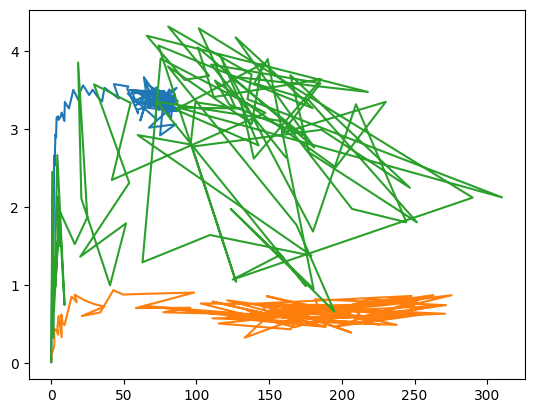

In [37]:
plt.plot(low_I_XZ_test_low_nonlinear, low_I_YZ_test_low_nonlinear, label = "Low diversity data")
plt.plot(low_I_XZ_test_mid_nonlinear, low_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
plt.plot(low_I_XZ_test_high_nonlinear, low_I_YZ_test_high_nonlinear, label = "High diversity data")


In [35]:
recon_loss_collected = []
prior_loss_collected = []

mid_I_XZ_test_low_nonlinear = []
mid_I_YZ_test_low_nonlinear = []

mid_I_XZ_test_mid_nonlinear = []
mid_I_YZ_test_mid_nonlinear = []

mid_I_XZ_test_high_nonlinear = []
mid_I_YZ_test_high_nonlinear = []

batch_size = 32
latent_dim = 10
max_epochs = 400

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=torch.nn.ReLU()
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=torch.nn.ReLU()
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainLowDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testMidDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_low_nonlinear.append(elbo_loss / len(testLowDivDataset))
    mid_I_YZ_test_low_nonlinear.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_mid_nonlinear.append(elbo_loss / len(testMidDivDataset))
    mid_I_YZ_test_mid_nonlinear.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_high_nonlinear.append(elbo_loss / len(testHighDivDataset))
    mid_I_YZ_test_high_nonlinear.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:18<30:07, 18.07s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:36<30:14, 18.32s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:55<30:03, 18.41s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [01:13<29:55, 18.51s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [01:34<31:08, 19.46s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [01:53<30:18, 19.14s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [02:12<30:09, 19.25s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [02:31<29:36, 19.10s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [02:50<28:58, 18.90s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [03:08<28:29, 18.79s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [03:26<27:52, 18.58s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [03:44<27:02, 18.23s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [04:02<26:56, 18.36s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [04:22<26:59, 18.61s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [04:41<26:59, 18.83s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [05:00<26:38, 18.80s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [05:18<26:16, 18.77s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [05:37<26:03, 18.84s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [05:56<25:29, 18.66s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [06:14<24:59, 18.51s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [06:32<24:33, 18.42s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [06:50<24:09, 18.34s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [07:09<23:54, 18.39s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [07:27<23:43, 18.49s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [07:46<23:21, 18.45s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [08:04<22:55, 18.34s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [08:22<22:45, 18.45s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [08:41<22:22, 18.38s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [08:59<22:09, 18.46s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [09:17<21:40, 18.31s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [09:36<21:26, 18.38s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [09:54<21:13, 18.45s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [10:13<20:49, 18.38s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [10:32<20:48, 18.63s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [10:50<20:28, 18.61s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [11:08<19:58, 18.44s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [11:27<19:42, 18.47s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [11:46<19:40, 18.74s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [12:05<19:12, 18.59s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [12:24<19:05, 18.78s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [12:42<18:41, 18.69s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [13:01<18:29, 18.80s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [13:20<18:00, 18.63s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [13:39<17:52, 18.82s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [13:58<17:45, 19.02s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [14:17<17:26, 19.04s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [14:36<16:54, 18.79s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [14:54<16:26, 18.62s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [15:12<16:02, 18.51s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [15:31<15:43, 18.51s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [15:50<15:33, 18.67s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [16:09<15:24, 18.87s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [16:29<15:21, 19.20s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [16:49<15:08, 19.32s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [17:08<14:51, 19.39s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [17:30<15:10, 20.23s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [17:51<14:50, 20.23s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [18:11<14:32, 20.29s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [18:32<14:14, 20.35s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [18:52<13:58, 20.44s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [19:13<13:37, 20.43s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [19:33<13:14, 20.38s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [19:53<12:52, 20.33s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [20:13<12:31, 20.30s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [20:34<12:11, 20.33s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [20:53<11:45, 20.15s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [21:13<11:19, 19.98s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [21:32<10:50, 19.72s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [21:51<10:20, 19.40s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [22:10<10:02, 19.44s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [22:30<09:48, 19.62s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [22:53<09:51, 20.40s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [23:19<10:24, 22.29s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [23:45<10:33, 23.45s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [24:12<10:32, 24.33s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [24:37<10:14, 24.58s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [25:03<09:57, 24.88s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [25:27<09:31, 24.85s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [25:53<09:11, 25.09s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [26:18<08:45, 25.00s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [26:43<08:22, 25.10s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [27:08<07:55, 25.04s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [27:33<07:28, 24.89s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [27:50<06:23, 22.58s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [28:07<05:36, 21.02s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [28:24<04:57, 19.81s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [28:41<04:26, 19.04s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [28:59<04:01, 18.55s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [29:16<03:39, 18.30s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [29:35<03:21, 18.29s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [29:53<03:01, 18.19s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [30:10<02:42, 18.04s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [30:28<02:23, 17.92s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [30:46<02:04, 17.81s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [31:04<01:47, 17.89s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [31:21<01:29, 17.82s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [31:39<01:11, 17.83s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [31:57<00:53, 17.91s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [32:16<00:36, 18.01s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [32:33<00:17, 17.88s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [32:51<00:00, 19.52s/it]

Text(0.5, 1.0, 'Models trained on Mid Diversity Data')

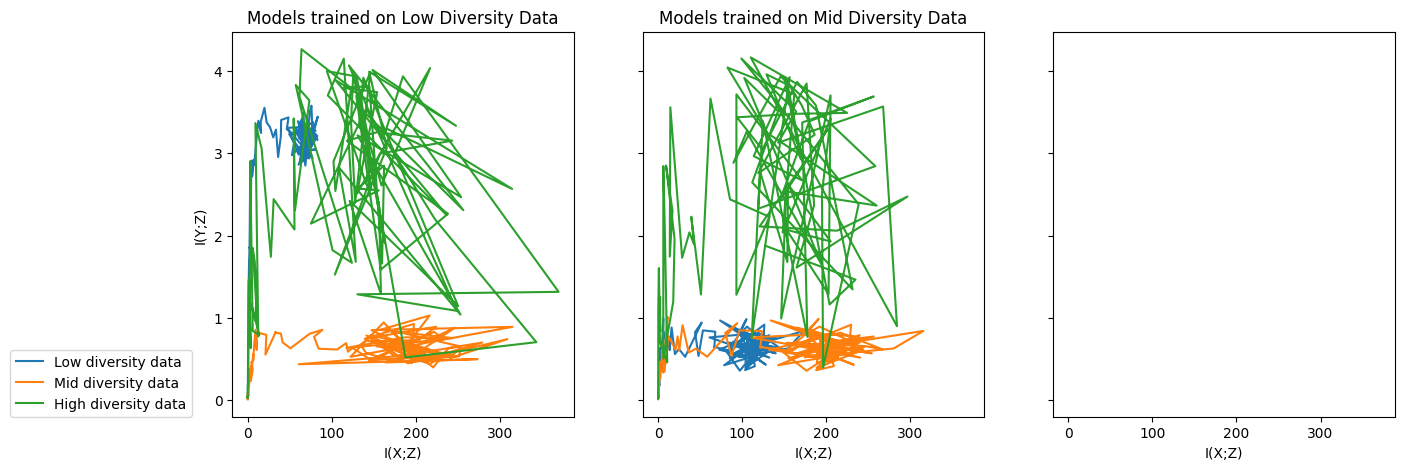

In [31]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)

axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')
axs[2].set_xlabel('I(X;Z)')


axs[0].plot(low_I_XZ_test_low_nonlinear, low_I_YZ_test_low_nonlinear, label = "Low diversity data")
axs[0].plot(low_I_XZ_test_mid_nonlinear, low_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
axs[0].plot(low_I_XZ_test_high_nonlinear, low_I_YZ_test_high_nonlinear, label = "High diversity data")
axs[0].set_title('Models trained on Low Diversity Data')

axs[0].legend(loc=(-.65, 0))

axs[1].plot(mid_I_XZ_test_low_nonlinear, mid_I_YZ_test_low_nonlinear, label = "Low diversity data")
axs[1].plot(mid_I_XZ_test_mid_nonlinear, mid_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
axs[1].plot(mid_I_XZ_test_high_nonlinear, mid_I_YZ_test_high_nonlinear, label = "High diversity data")
axs[1].set_title('Models trained on Mid Diversity Data')

In [34]:
recon_loss_collected = []
prior_loss_collected = []

high_I_XZ_test_low_nonlinear = []
high_I_YZ_test_low_nonlinear = []

high_I_XZ_test_mid_nonlinear = []
high_I_YZ_test_mid_nonlinear = []

high_I_XZ_test_high_nonlinear = []
high_I_YZ_test_high_nonlinear = []

batch_size = 32
latent_dim = 10
max_epochs = 400

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=torch.nn.ReLU()
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=5,
        activation=torch.nn.ReLU()
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainHighDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testHighDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_low_nonlinear.append(elbo_loss / len(testLowDivDataset))
    high_I_YZ_test_low_nonlinear.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testMidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_mid_nonlinear.append(elbo_loss / len(testMidDivDataset))
    high_I_YZ_test_mid_nonlinear.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in testHighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-1 * torch.eye(10)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(5)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_high_nonlinear.append(elbo_loss / len(testHighDivDataset))
    high_I_YZ_test_high_nonlinear.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:04<06:43,  4.03s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:08<07:02,  4.26s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:12<07:05,  4.34s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:17<06:52,  4.25s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:21<06:40,  4.18s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:25<06:38,  4.20s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:29<06:41,  4.27s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [00:33<06:26,  4.16s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [00:37<06:14,  4.07s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [00:41<06:07,  4.04s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [00:45<06:02,  4.03s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [00:50<06:21,  4.29s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [00:54<06:20,  4.33s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [00:59<06:14,  4.30s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [01:03<06:07,  4.27s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [01:07<05:57,  4.20s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [01:11<05:51,  4.18s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [01:15<05:49,  4.21s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [01:20<05:58,  4.37s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [01:24<05:52,  4.36s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [01:28<05:38,  4.24s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [01:32<05:31,  4.20s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [01:37<05:29,  4.22s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [01:41<05:20,  4.16s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [01:45<05:19,  4.21s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [01:49<05:12,  4.17s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [01:53<05:03,  4.10s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [01:57<04:54,  4.04s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [02:01<04:53,  4.07s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [02:05<04:50,  4.09s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [02:09<04:47,  4.10s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [02:14<04:48,  4.18s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [02:18<04:48,  4.25s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [02:22<04:45,  4.26s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [02:26<04:39,  4.23s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [02:30<04:29,  4.15s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [02:34<04:23,  4.12s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [02:39<04:19,  4.13s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [02:43<04:14,  4.11s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [02:47<04:14,  4.17s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [02:51<04:11,  4.19s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [02:56<04:11,  4.27s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [03:00<04:07,  4.26s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [03:04<04:04,  4.28s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [03:08<03:57,  4.23s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [03:13<03:51,  4.21s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [03:17<03:44,  4.16s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [03:21<03:42,  4.20s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [03:25<03:42,  4.29s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [03:29<03:36,  4.24s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [03:34<03:31,  4.23s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [03:38<03:27,  4.24s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [03:42<03:26,  4.30s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [03:47<03:23,  4.34s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [03:51<03:21,  4.38s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [03:56<03:25,  4.57s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [04:01<03:18,  4.52s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [04:05<03:10,  4.43s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [04:09<03:01,  4.32s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [04:13<02:55,  4.29s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [04:17<02:49,  4.24s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [04:22<02:45,  4.25s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [04:26<02:48,  4.42s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [04:31<02:44,  4.44s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [04:35<02:36,  4.34s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [04:39<02:29,  4.28s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [04:43<02:23,  4.22s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [04:48<02:20,  4.25s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [04:52<02:18,  4.33s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [04:56<02:14,  4.34s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [05:01<02:10,  4.34s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [05:05<02:04,  4.31s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [05:09<02:00,  4.31s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [05:14<01:56,  4.30s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [05:18<01:51,  4.29s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [05:22<01:46,  4.28s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [05:26<01:42,  4.25s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [05:31<01:37,  4.26s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [05:35<01:34,  4.31s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [05:39<01:29,  4.28s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [05:43<01:24,  4.24s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [05:48<01:20,  4.25s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [05:52<01:16,  4.25s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [05:56<01:12,  4.28s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [06:01<01:08,  4.29s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [06:05<01:03,  4.26s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [06:09<01:00,  4.30s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [06:13<00:55,  4.29s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [06:18<00:51,  4.26s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [06:22<00:47,  4.31s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [06:26<00:43,  4.31s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [06:31<00:38,  4.29s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [06:35<00:35,  4.39s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [06:40<00:32,  4.63s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [06:45<00:27,  4.52s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [06:49<00:22,  4.41s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [06:53<00:17,  4.37s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [06:58<00:13,  4.48s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [07:03<00:09,  4.71s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [07:08<00:04,  4.64s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [07:12<00:00,  4.28s/it]

Text(0.5, 1.0, 'Models trained on High Diversity Data')

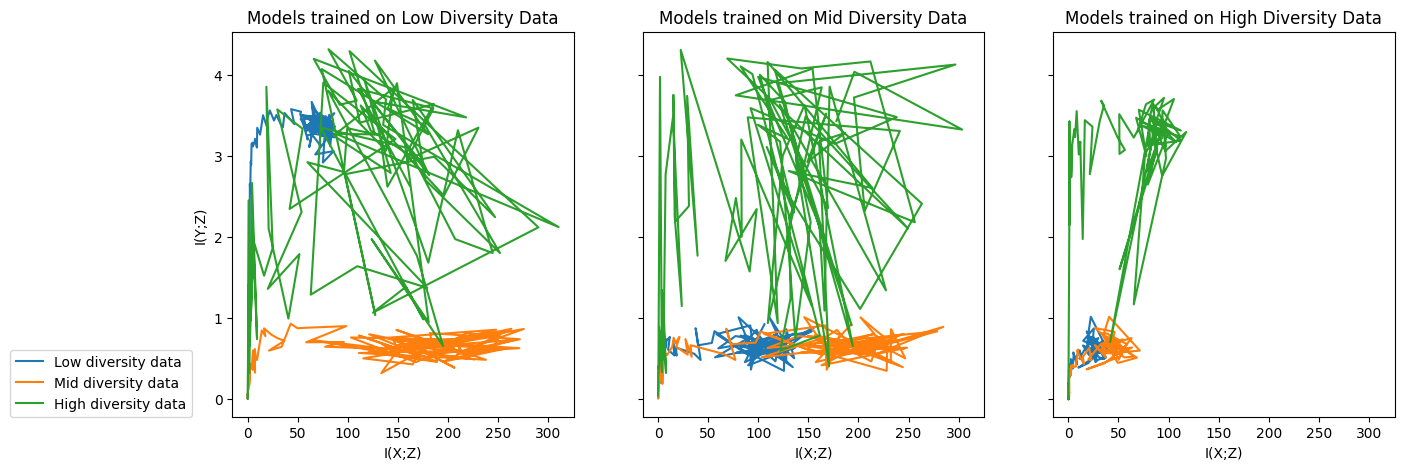

In [38]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)

axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')
axs[2].set_xlabel('I(X;Z)')


axs[0].plot(low_I_XZ_test_low_nonlinear, low_I_YZ_test_low_nonlinear, label = "Low diversity data")
axs[0].plot(low_I_XZ_test_mid_nonlinear, low_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
axs[0].plot(low_I_XZ_test_high_nonlinear, low_I_YZ_test_high_nonlinear, label = "High diversity data")
axs[0].set_title('Models trained on Low Diversity Data')

axs[0].legend(loc=(-.65, 0))

axs[1].plot(mid_I_XZ_test_low_nonlinear, mid_I_YZ_test_low_nonlinear, label = "Low diversity data")
axs[1].plot(mid_I_XZ_test_mid_nonlinear, mid_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
axs[1].plot(mid_I_XZ_test_high_nonlinear, mid_I_YZ_test_high_nonlinear, label = "High diversity data")
axs[1].set_title('Models trained on Mid Diversity Data')

axs[2].plot(high_I_XZ_test_low_nonlinear, high_I_YZ_test_low_nonlinear, label = "Low diversity data")
axs[2].plot(high_I_XZ_test_mid_nonlinear, high_I_YZ_test_mid_nonlinear, label = "Mid diversity data")
axs[2].plot(high_I_XZ_test_high_nonlinear, high_I_YZ_test_high_nonlinear, label = "High diversity data")
axs[2].set_title('Models trained on High Diversity Data')

In [199]:
recon_loss_collected = []
prior_loss_collected = []

low_I_XZ_test_low = []
low_I_YZ_test_low = []

low_I_XZ_test_mid = []
low_I_YZ_test_mid = []

low_I_XZ_test_high = []
low_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=trainLowDivDataset.data_dim,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainLowDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testLowDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in LowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_low.append(elbo_loss / len(LowDivDataset))
    low_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in MidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov()
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_mid.append(elbo_loss / len(MidDivDataset))
    low_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in HighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_high.append(elbo_loss / len(HighDivDataset))
    low_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:09<15:00,  9.01s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:18<14:57,  9.07s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:27<14:56,  9.15s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:37<15:27,  9.56s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:47<15:20,  9.59s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:56<15:03,  9.51s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [01:05<14:44,  9.41s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [01:15<14:35,  9.42s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [01:24<14:16,  9.31s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [01:33<14:07,  9.31s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [01:43<14:09,  9.44s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [01:52<13:51,  9.34s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [02:01<13:45,  9.38s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [02:11<13:33,  9.35s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [02:20<13:27,  9.39s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [02:30<13:32,  9.56s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [02:40<13:23,  9.56s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [02:49<13:09,  9.52s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [02:58<12:56,  9.47s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [03:07<12:33,  9.30s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [03:17<12:23,  9.30s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [03:26<12:17,  9.34s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [03:36<12:12,  9.40s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [03:45<12:12,  9.52s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [03:55<11:56,  9.43s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [04:04<11:40,  9.35s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [04:13<11:33,  9.37s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [04:23<11:30,  9.46s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [04:32<11:18,  9.43s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [04:42<11:14,  9.51s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [04:51<11:02,  9.46s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [05:01<10:52,  9.45s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [05:10<10:33,  9.32s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [05:19<10:27,  9.37s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [05:29<10:19,  9.39s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [05:38<10:15,  9.47s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [05:48<10:02,  9.42s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [05:57<10:01,  9.55s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [06:07<09:49,  9.51s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [06:16<09:34,  9.41s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [06:25<09:21,  9.35s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [06:35<09:10,  9.33s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [06:44<09:03,  9.36s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [06:54<09:00,  9.47s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [07:03<08:50,  9.47s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [07:12<08:35,  9.38s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [07:22<08:23,  9.33s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [07:31<08:15,  9.36s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [07:40<08:05,  9.34s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [07:50<07:55,  9.33s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [07:59<07:50,  9.41s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [08:08<07:38,  9.36s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [08:18<07:33,  9.45s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [08:27<07:21,  9.39s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [08:37<07:09,  9.34s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [08:46<07:07,  9.50s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [08:56<07:01,  9.57s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [09:06<06:57,  9.71s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [09:16<06:42,  9.59s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [09:25<06:30,  9.52s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [09:34<06:19,  9.49s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [09:43<06:05,  9.38s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [09:53<05:59,  9.46s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [10:02<05:47,  9.40s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [10:12<05:38,  9.40s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [10:21<05:26,  9.33s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [10:30<05:18,  9.36s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [10:40<05:09,  9.39s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [10:49<04:58,  9.33s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [10:58<04:46,  9.23s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [11:07<04:39,  9.32s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [11:17<04:28,  9.27s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [11:26<04:20,  9.29s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [11:35<04:10,  9.28s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [11:45<04:01,  9.30s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [11:54<03:54,  9.39s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [12:03<03:44,  9.35s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [12:13<03:36,  9.41s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [12:22<03:24,  9.32s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [12:31<03:14,  9.28s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [12:40<03:05,  9.26s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [12:50<02:55,  9.25s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [12:59<02:48,  9.37s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [13:09<02:38,  9.32s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [13:18<02:29,  9.37s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [13:27<02:19,  9.33s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [13:36<02:09,  9.23s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [13:46<02:00,  9.28s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [13:55<01:51,  9.29s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [14:04<01:41,  9.27s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [14:14<01:34,  9.45s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [14:24<01:25,  9.49s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [14:33<01:15,  9.44s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [14:42<01:05,  9.41s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [14:51<00:55,  9.33s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [15:01<00:46,  9.25s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [15:10<00:37,  9.31s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [15:20<00:28,  9.58s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [15:29<00:18,  9.46s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [15:39<00:09,  9.51s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [15:48<00:00,  9.39s/it]

In [200]:
recon_loss_collected = []
prior_loss_collected = []

mid_I_XZ_test_low = []
mid_I_YZ_test_low = []

mid_I_XZ_test_mid = []
mid_I_YZ_test_mid = []

mid_I_XZ_test_high = []
mid_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=trainLowDivDataset.data_dim,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainMidDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testMidDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in LowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_low.append(elbo_loss / len(LowDivDataset))
    mid_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in MidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov()
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_mid.append(elbo_loss / len(MidDivDataset))
    mid_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in HighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    mid_I_XZ_test_high.append(elbo_loss / len(HighDivDataset))
    mid_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:04<07:52,  4.73s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:09<08:04,  4.89s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:14<07:52,  4.83s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:19<07:41,  4.75s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:23<07:31,  4.70s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:28<07:34,  4.78s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:33<07:32,  4.81s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [00:38<07:35,  4.89s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [00:43<07:26,  4.85s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [00:48<07:17,  4.81s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [00:52<07:09,  4.77s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [00:57<07:06,  4.79s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [01:02<07:06,  4.84s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [01:07<07:02,  4.85s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [01:12<06:55,  4.83s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [01:17<06:55,  4.89s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [01:22<06:50,  4.89s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [01:27<06:45,  4.88s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [01:31<06:42,  4.90s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [01:37<06:42,  4.97s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [01:42<06:39,  4.99s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [01:47<06:42,  5.10s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [01:52<06:37,  5.10s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [01:57<06:28,  5.04s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [02:02<06:24,  5.06s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [02:07<06:16,  5.02s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [02:12<06:14,  5.06s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [02:17<06:12,  5.11s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [02:23<06:13,  5.18s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [02:28<06:14,  5.27s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [03:59<35:56, 30.80s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [04:04<26:39, 23.17s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [04:09<20:07, 17.76s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [04:14<15:30, 13.89s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [04:19<12:19, 11.20s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [04:24<10:03,  9.29s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [04:29<08:37,  8.09s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [04:34<07:29,  7.13s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [04:39<06:43,  6.51s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [04:44<06:08,  6.04s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [04:49<05:48,  5.81s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [04:54<05:26,  5.54s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [04:59<05:08,  5.32s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [05:04<04:55,  5.18s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [05:09<04:47,  5.14s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [05:14<04:42,  5.15s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [05:19<04:44,  5.26s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [05:25<04:37,  5.23s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [05:30<04:29,  5.18s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [05:35<04:24,  5.19s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [05:40<04:22,  5.24s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [05:45<04:12,  5.16s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [05:50<04:06,  5.13s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [05:55<04:00,  5.13s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [06:00<03:53,  5.07s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [06:05<03:48,  5.09s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [06:10<03:42,  5.05s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [06:16<03:42,  5.18s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [06:21<03:40,  5.26s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [06:27<03:41,  5.39s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [06:32<03:34,  5.37s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [06:38<03:26,  5.31s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [06:43<03:20,  5.28s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [06:48<03:13,  5.23s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [06:53<03:09,  5.28s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [06:59<03:07,  5.34s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [07:04<02:59,  5.28s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [07:09<02:52,  5.22s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [07:14<02:47,  5.23s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [07:19<02:41,  5.21s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [07:25<02:36,  5.21s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [07:30<02:32,  5.27s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [07:35<02:27,  5.29s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [07:41<02:21,  5.25s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [07:46<02:16,  5.25s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [07:51<02:09,  5.18s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [07:56<02:04,  5.19s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [08:01<01:58,  5.17s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [08:06<01:54,  5.22s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [08:12<01:52,  5.35s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [08:17<01:46,  5.31s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [08:23<01:42,  5.39s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [08:28<01:37,  5.44s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [08:34<01:31,  5.37s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [08:39<01:26,  5.40s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [08:45<01:21,  5.45s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [08:50<01:17,  5.51s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [08:56<01:11,  5.47s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [09:01<01:04,  5.41s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [09:06<00:59,  5.37s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [09:12<00:53,  5.33s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [09:17<00:47,  5.28s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [09:22<00:42,  5.28s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [09:27<00:37,  5.31s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [09:33<00:31,  5.33s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [09:38<00:26,  5.32s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [09:43<00:21,  5.27s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [09:48<00:15,  5.27s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [09:54<00:10,  5.27s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [09:59<00:05,  5.29s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [10:04<00:00,  5.99s/it]

In [201]:
recon_loss_collected = []
prior_loss_collected = []

high_I_XZ_test_low = []
high_I_YZ_test_low = []

high_I_XZ_test_mid = []
high_I_YZ_test_mid = []

high_I_XZ_test_high = []
high_I_YZ_test_high = []

batch_size = 32
latent_dim = 10
max_epochs = 200

val_losses = {}

betas = np.logspace(-10, 3, 101)
for beta in tqdm(betas):
    print(beta)
    val_losses[beta] = []
    
    encoder = Encoder(
        input_dim=trainLowDivDataset.data_dim,
        hidden_dims=[200,200,200],
        latent_dim=latent_dim,
        activation=None
    )
    
    decoder = Decoder(
        latent_dim=latent_dim,
        hidden_dims=[200,200,200],
        output_dim=trainLowDivDataset.data_dim,
        activation=None
    )
    
    vib = VariationalIB(encoder, decoder, latent_dim=latent_dim, input_dim=trainLowDivDataset.data_dim)
    optim = torch.optim.Adam(params=vib.parameters(), lr=1e-4)
    
    for epoch in range(max_epochs):
        for batch in trainHighDivDataLoader:
            optim.zero_grad()
            
            batch = vib(batch)

            elbo_loss = (vib.prior_loss(batch) / batch['X'].shape[0]).mean()
            Y = batch['Y']
            Yhat = batch['Yhat']
            recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).mean()

            loss = recon_loss + beta * elbo_loss
            loss.backward()
            optim.step()

            
        with torch.no_grad():
            elbo_loss = 0
            recon_loss = 0
            for batch in testHighDivDataLoader:
                
                batch = vib(batch)
    
                elbo_loss += vib.prior_loss(batch).sum()
                Y = batch['Y']
                Yhat = batch['Yhat']
                recon_loss = (((Yhat - Y) ** 2).sum(dim=-1)/vib.input_dim).sum()
        
        loss = recon_loss + beta * elbo_loss
        val_losses[beta].append(loss.item())
    #print(val_losses[beta])
    
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in LowDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_low.append(elbo_loss / len(LowDivDataset))
    high_I_YZ_test_low.append(iyz)

    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in MidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov()
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_mid.append(elbo_loss / len(MidDivDataset))
    high_I_YZ_test_mid.append(iyz)



    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in HighDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-3 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov() + 0 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    high_I_XZ_test_high.append(elbo_loss / len(HighDivDataset))
    high_I_YZ_test_high.append(iyz)

  0%|                                                                                                                                                                                   | 0/101 [00:00<?, ?it/s]

1e-10


  1%|█▋                                                                                                                                                                         | 1/101 [00:02<03:32,  2.12s/it]

1.348962882591656e-10


  2%|███▍                                                                                                                                                                       | 2/101 [00:04<03:17,  1.99s/it]

1.8197008586099825e-10


  3%|█████                                                                                                                                                                      | 3/101 [00:06<03:19,  2.03s/it]

2.4547089156850336e-10


  4%|██████▊                                                                                                                                                                    | 4/101 [00:08<03:16,  2.03s/it]

3.3113112148259076e-10


  5%|████████▍                                                                                                                                                                  | 5/101 [00:10<03:11,  1.99s/it]

4.4668359215096347e-10


  6%|██████████▏                                                                                                                                                                | 6/101 [00:12<03:08,  1.99s/it]

6.025595860743569e-10


  7%|███████████▊                                                                                                                                                               | 7/101 [00:13<03:05,  1.98s/it]

8.128305161640995e-10


  8%|█████████████▌                                                                                                                                                             | 8/101 [00:16<03:05,  2.00s/it]

1.0964781961431829e-09


  9%|███████████████▏                                                                                                                                                           | 9/101 [00:17<03:01,  1.98s/it]

1.4791083881682072e-09


 10%|████████████████▊                                                                                                                                                         | 10/101 [00:19<02:57,  1.95s/it]

1.9952623149688828e-09


 11%|██████████████████▌                                                                                                                                                       | 11/101 [00:21<02:56,  1.97s/it]

2.691534803926914e-09


 12%|████████████████████▏                                                                                                                                                     | 12/101 [00:23<02:57,  1.99s/it]

3.6307805477010177e-09


 13%|█████████████████████▉                                                                                                                                                    | 13/101 [00:25<02:57,  2.02s/it]

4.897788193684457e-09


 14%|███████████████████████▌                                                                                                                                                  | 14/101 [00:27<02:54,  2.01s/it]

6.606934480075964e-09


 15%|█████████████████████████▏                                                                                                                                                | 15/101 [00:29<02:52,  2.01s/it]

8.912509381337441e-09


 16%|██████████████████████████▉                                                                                                                                               | 16/101 [00:32<02:56,  2.07s/it]

1.202264434617413e-08


 17%|████████████████████████████▌                                                                                                                                             | 17/101 [00:34<02:55,  2.09s/it]

1.6218100973589297e-08


 18%|██████████████████████████████▎                                                                                                                                           | 18/101 [00:36<02:52,  2.08s/it]

2.1877616239495518e-08


 19%|███████████████████████████████▉                                                                                                                                          | 19/101 [00:38<02:50,  2.08s/it]

2.95120922666639e-08


 20%|█████████████████████████████████▋                                                                                                                                        | 20/101 [00:40<02:48,  2.09s/it]

3.981071705534969e-08


 21%|███████████████████████████████████▎                                                                                                                                      | 21/101 [00:42<02:43,  2.04s/it]

5.3703179637025324e-08


 22%|█████████████████████████████████████                                                                                                                                     | 22/101 [00:44<02:44,  2.08s/it]

7.244359600749906e-08


 23%|██████████████████████████████████████▋                                                                                                                                   | 23/101 [00:46<02:44,  2.11s/it]

9.772372209558111e-08


 24%|████████████████████████████████████████▍                                                                                                                                 | 24/101 [00:48<02:38,  2.06s/it]

1.3182567385564074e-07


 25%|██████████████████████████████████████████                                                                                                                                | 25/101 [00:50<02:36,  2.06s/it]

1.7782794100389227e-07


 26%|███████████████████████████████████████████▊                                                                                                                              | 26/101 [00:52<02:35,  2.08s/it]

2.39883291901949e-07


 27%|█████████████████████████████████████████████▍                                                                                                                            | 27/101 [00:54<02:31,  2.05s/it]

3.235936569296281e-07


 28%|███████████████████████████████████████████████▏                                                                                                                          | 28/101 [00:56<02:27,  2.02s/it]

4.365158322401665e-07


 29%|████████████████████████████████████████████████▊                                                                                                                         | 29/101 [00:58<02:24,  2.00s/it]

5.888436553555884e-07


 30%|██████████████████████████████████████████████████▍                                                                                                                       | 30/101 [01:00<02:23,  2.02s/it]

7.943282347242822e-07


 31%|████████████████████████████████████████████████████▏                                                                                                                     | 31/101 [01:02<02:21,  2.03s/it]

1.071519305237607e-06


 32%|█████████████████████████████████████████████████████▊                                                                                                                    | 32/101 [01:05<02:22,  2.06s/it]

1.445439770745928e-06


 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 33/101 [01:07<02:18,  2.04s/it]

1.9498445997580454e-06


 34%|█████████████████████████████████████████████████████████▏                                                                                                                | 34/101 [01:09<02:17,  2.05s/it]

2.6302679918953817e-06


 35%|██████████████████████████████████████████████████████████▉                                                                                                               | 35/101 [01:11<02:15,  2.05s/it]

3.548133892335753e-06


 36%|████████████████████████████████████████████████████████████▌                                                                                                             | 36/101 [01:13<02:15,  2.09s/it]

4.78630092322638e-06


 37%|██████████████████████████████████████████████████████████████▎                                                                                                           | 37/101 [01:15<02:16,  2.13s/it]

6.4565422903465625e-06


 38%|███████████████████████████████████████████████████████████████▉                                                                                                          | 38/101 [01:17<02:11,  2.08s/it]

8.709635899560814e-06


 39%|█████████████████████████████████████████████████████████████████▋                                                                                                        | 39/101 [01:19<02:07,  2.06s/it]

1.1748975549395302e-05


 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 40/101 [01:21<02:07,  2.09s/it]

1.584893192461114e-05


 41%|█████████████████████████████████████████████████████████████████████                                                                                                     | 41/101 [01:23<02:05,  2.09s/it]

2.1379620895022323e-05


 42%|██████████████████████████████████████████████████████████████████████▋                                                                                                   | 42/101 [01:25<02:01,  2.06s/it]

2.8840315031266056e-05


 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 43/101 [01:27<01:57,  2.03s/it]

3.8904514499428046e-05


 44%|██████████████████████████████████████████████████████████████████████████                                                                                                | 44/101 [01:30<02:02,  2.14s/it]

5.2480746024977334e-05


 45%|███████████████████████████████████████████████████████████████████████████▋                                                                                              | 45/101 [01:32<01:59,  2.14s/it]

7.079457843841388e-05


 46%|█████████████████████████████████████████████████████████████████████████████▍                                                                                            | 46/101 [01:34<01:56,  2.12s/it]

9.549925860214369e-05


 47%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 47/101 [01:36<01:54,  2.13s/it]

0.0001288249551693135


 48%|████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 48/101 [01:38<01:52,  2.13s/it]

0.00017378008287493763


 49%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 49/101 [01:40<01:49,  2.11s/it]

0.00023442288153199226


 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 50/101 [01:42<01:49,  2.14s/it]

0.00031622776601683794


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 51/101 [01:45<01:46,  2.14s/it]

0.00042657951880159257


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 52/101 [01:47<01:46,  2.17s/it]

0.0005754399373371566


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 53/101 [01:49<01:44,  2.17s/it]

0.0007762471166286928


 53%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 54/101 [01:51<01:41,  2.16s/it]

0.0010471285480509007


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 55/101 [01:53<01:37,  2.12s/it]

0.0014125375446227555


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 56/101 [01:55<01:36,  2.13s/it]

0.0019054607179632482


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 57/101 [01:58<01:36,  2.19s/it]

0.0025703957827688645


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 58/101 [02:00<01:32,  2.16s/it]

0.0034673685045253167


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 59/101 [02:02<01:30,  2.14s/it]

0.004677351412871981


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60/101 [02:04<01:28,  2.15s/it]

0.006309573444801942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 61/101 [02:06<01:25,  2.13s/it]

0.008511380382023776


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62/101 [02:08<01:24,  2.16s/it]

0.01148153621496884


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63/101 [02:11<01:22,  2.17s/it]

0.015488166189124795


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64/101 [02:13<01:19,  2.14s/it]

0.02089296130854041


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65/101 [02:15<01:18,  2.17s/it]

0.02818382931264461


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66/101 [02:17<01:16,  2.20s/it]

0.038018939632056124


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 67/101 [02:19<01:13,  2.16s/it]

0.05128613839913659


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 68/101 [02:21<01:12,  2.20s/it]

0.06918309709189363


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69/101 [02:24<01:09,  2.18s/it]

0.09332543007969925


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70/101 [02:26<01:06,  2.15s/it]

0.12589254117941662


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71/101 [02:28<01:06,  2.21s/it]

0.1698243652461746


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 72/101 [02:30<01:03,  2.18s/it]

0.22908676527677702


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73/101 [02:32<01:00,  2.16s/it]

0.30902954325135923


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/101 [02:34<00:57,  2.12s/it]

0.41686938347033636


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75/101 [02:36<00:54,  2.11s/it]

0.5623413251903491


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76/101 [02:38<00:51,  2.07s/it]

0.7585775750291851


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/101 [02:41<00:50,  2.10s/it]

1.0232929922807537


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78/101 [02:43<00:49,  2.13s/it]

1.3803842646028865


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 79/101 [02:45<00:50,  2.29s/it]

1.8620871366628655


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 80/101 [02:48<00:49,  2.34s/it]

2.5118864315095824


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 81/101 [02:50<00:48,  2.41s/it]

3.3884415613920345


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 82/101 [02:53<00:44,  2.35s/it]

4.570881896148752


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 83/101 [02:55<00:41,  2.29s/it]

6.165950018614835


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 84/101 [02:57<00:38,  2.29s/it]

8.317637711026709


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 85/101 [02:59<00:35,  2.22s/it]

11.220184543019652


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 86/101 [03:01<00:33,  2.21s/it]

15.135612484362072


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 87/101 [03:03<00:30,  2.19s/it]

20.417379446695318


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 88/101 [03:06<00:28,  2.16s/it]

27.542287033381747


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 89/101 [03:08<00:26,  2.17s/it]

37.15352290971728


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 90/101 [03:10<00:23,  2.17s/it]

50.11872336272735


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 91/101 [03:12<00:21,  2.18s/it]

67.60829753919819


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 92/101 [03:14<00:19,  2.18s/it]

91.20108393559116


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 93/101 [03:17<00:17,  2.21s/it]

123.02687708123811


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 94/101 [03:19<00:15,  2.18s/it]

165.9586907437563


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/101 [03:21<00:13,  2.21s/it]

223.87211385683378


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 96/101 [03:23<00:11,  2.22s/it]

301.9951720402019


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 97/101 [03:25<00:08,  2.19s/it]

407.38027780411386


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/101 [03:27<00:06,  2.15s/it]

549.5408738576248


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 99/101 [03:30<00:04,  2.14s/it]

741.3102413009192


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 100/101 [03:32<00:02,  2.21s/it]

1000.0



00%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [03:34<00:00,  2.12s/it]

Text(0.5, 1.0, 'Models trained on High Diversity Data')

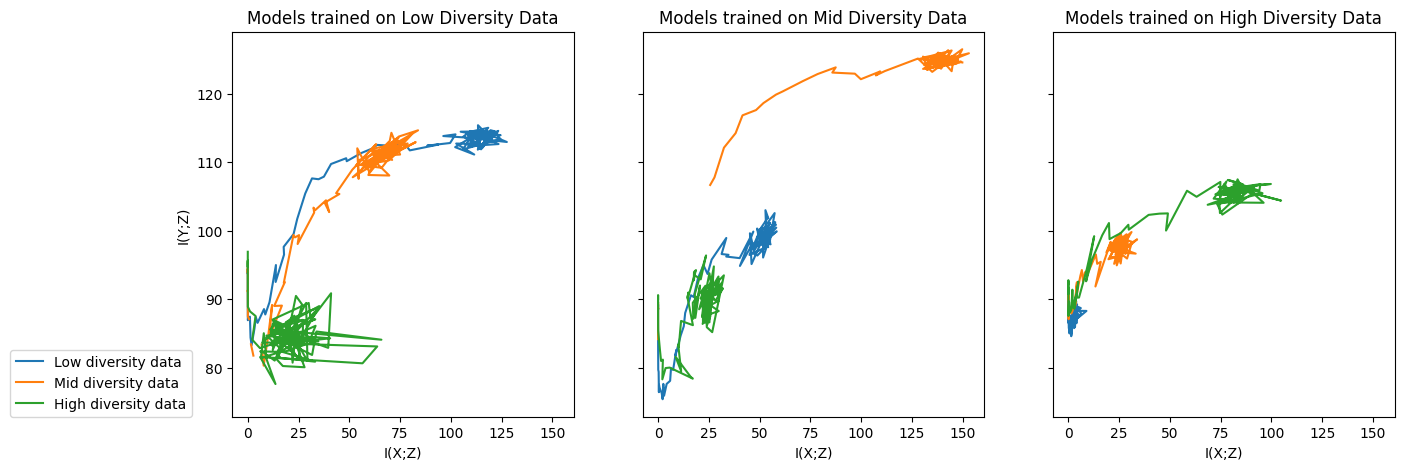

In [202]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
fig.set_size_inches(15,5)

axs[0].set_ylabel('I(Y;Z)')
axs[0].set_xlabel('I(X;Z)')
axs[1].set_xlabel('I(X;Z)')
axs[2].set_xlabel('I(X;Z)')


axs[0].plot(low_I_XZ_test_low, low_I_YZ_test_low, label = "Low diversity data")
axs[0].plot(low_I_XZ_test_mid, low_I_YZ_test_mid, label = "Mid diversity data")
axs[0].plot(low_I_XZ_test_high, low_I_YZ_test_high, label = "High diversity data")
axs[0].set_title('Models trained on Low Diversity Data')

axs[0].legend(loc=(-.65, 0))

axs[1].plot(mid_I_XZ_test_low, mid_I_YZ_test_low, label = "Low diversity data")
axs[1].plot(mid_I_XZ_test_mid, mid_I_YZ_test_mid, label = "Mid diversity data")
axs[1].plot(mid_I_XZ_test_high, mid_I_YZ_test_high, label = "High diversity data")
axs[1].set_title('Models trained on Mid Diversity Data')

axs[2].plot(high_I_XZ_test_low, high_I_YZ_test_low, label = "Low diversity data")
axs[2].plot(high_I_XZ_test_mid, high_I_YZ_test_mid, label = "Mid diversity data")
axs[2].plot(high_I_XZ_test_high, high_I_YZ_test_high, label = "High diversity data")
axs[2].set_title('Models trained on High Diversity Data')

In [188]:
    with torch.no_grad():
        elbo_loss = 0
        recon_loss = 0
        Y = []
        Yhat = []
        for batch in MidDivDataLoader:
            
            batch = vib(batch)
    
            elbo_loss += vib.prior_loss(batch).sum()
            Y.append(batch['Y'])
            Yhat.append(batch['Yhat'])

        Y = torch.concat(Y, dim = 0)
        Yhat = torch.concat(Yhat, dim = 0)
        yyhat = torch.concat([Y, Yhat], dim = 1)
        Hyyhat = -torch.log(
            torch.linalg.det(
                yyhat.T.cov() + 1e-2 * torch.eye(2*trainLowDivDataset.data_dim)
            )
        )
        Hy = -torch.log(
            torch.linalg.det(
                Y.T.cov()
            )
        )
        Hyhat = -torch.log(
            torch.linalg.det(
                Yhat.T.cov() + 1e-1 * torch.eye(trainLowDivDataset.data_dim)
            )
        )
        iyz = Hyyhat - Hy - Hyhat
        loss = recon_loss + beta * elbo_loss

    low_I_XZ_test_mid.append(elbo_loss / len(MidDivDataset))
    low_I_YZ_test_mid.append(iyz)

In [189]:
-torch.log(torch.linalg.det(yyhat.T.cov()+1e-2 * torch.eye(2*trainLowDivDataset.data_dim)))

tensor(18.0752)

In [190]:
Hy

tensor(-88.6357)

In [191]:
Hyhat

tensor(55.1935)

In [192]:
iyz

tensor(51.5174)